In [173]:
import csv
f1 = open ("C:\Users\Anmol Mishra\CC3DWorkspace\Phase 7\Cell Size 1000\Circle R2\Demo_CellSize1000.cc3d-2016-08-13-12-50-50-362000\data.csv" , "rb")
data = csv.reader(f1)

In [174]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [175]:
newdata = []
for line in data:
    newdata.append(line)
finalVolume = int(newdata[-1][3])

In [176]:
for i in range(len(newdata)):
    if (int(newdata[i][3])>finalVolume):
        finalVolume = int(newdata[i][3])

In [177]:
tend = 4000

In [178]:
freespace = []
for i in range(len(newdata)):
    if (int(newdata[i][0]) != int(newdata[i-1][0])):
        freespace.append(finalVolume - int(newdata[i][3]))

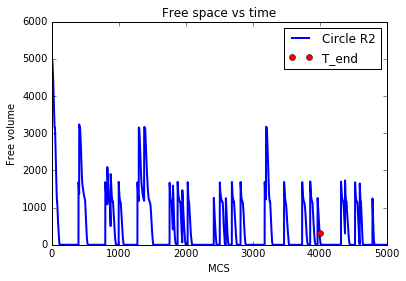

In [179]:
plt.plot(freespace , linewidth = 2 , label = "Circle R2")
plt.plot( [tend], freespace[tend] , 'ro' , label = "T_end")
plt.title("Free space vs time")
plt.xlabel("MCS")
plt.ylabel("Free volume")
plt.legend()
plt.savefig("Free space Circle R2")

In [180]:
noofcells = []
count =0
for i in range(len(newdata)):
    if (int(newdata[i][0]) == int(newdata[i-1][0])):
        count = count+1
    else :
        noofcells.append(count+1)
        count=0

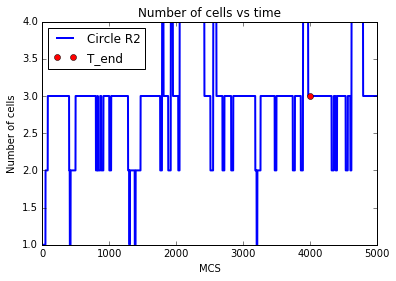

In [181]:
plt.plot( noofcells, linewidth = 2 , label = "Circle R2")
plt.plot( [tend], noofcells[tend] , 'ro' , label = "T_end")
plt.title("Number of cells vs time")
plt.xlabel("MCS")
plt.ylabel("Number of cells")
plt.legend( loc = 2)
plt.savefig("Number of Cells Circle R2")

In [182]:
volume = []
varvolume = []
for i in range(len(newdata)):
    if (int(newdata[i][0]) == int(newdata[i-1][0]) and i != 0):
        volume.append(int(newdata[i-1][2]))
    else :
        volume.append(int(newdata[i-1][2]))
        npvolume = np.array(volume)
        varvolume.append(npvolume.std())
        volume = []
npvolume = np.array(volume)
varvolume.append(npvolume.std())
del varvolume[0]

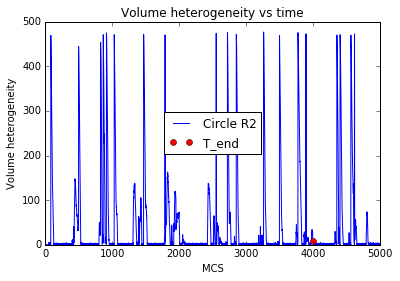

In [183]:
plt.plot(varvolume, label = "Circle R2")
plt.plot( [tend], varvolume[tend] , 'ro' , label = "T_end")
plt.title("Volume heterogeneity vs time")
plt.xlabel("MCS")
plt.ylabel("Volume heterogeneity")
plt.legend(loc = 0)
plt.savefig("Volume Heterogeneity Circle R2")

In [184]:
area = []
vararea = []
for i in range(len(newdata)):
    if (int(newdata[i][0]) == int(newdata[i-1][0]) and i != 0):
        area.append(float(newdata[i-1][4]))
    else :
        area.append(float(newdata[i-1][4]))
        nparea = np.array(area)
        vararea.append(nparea.std())
        area = []
nparea = np.array(area)
vararea.append(nparea.std())
del vararea[0]

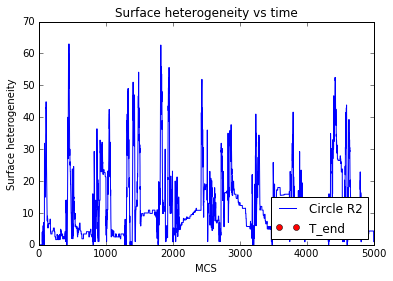

In [185]:
plt.plot(vararea, label = "Circle R2")
plt.plot( [tend], vararea[tend] , 'ro' , label = "T_end")
plt.title("Surface heterogeneity vs time")
plt.xlabel("MCS")
plt.ylabel("Surface heterogeneity")
plt.legend(loc = 4)
plt.savefig("Surface Heterogeneity Circle R2")

In [186]:
from math import sqrt

In [187]:
X = float(newdata[0][5])
Y = float(newdata[0][6])
datatend = []
datatend100 = []
datatend200 = []
for i in newdata:
    if int(i[0])==tend:
        distance = (sqrt((float(i[5])-X)**2 + (float(i[6])-Y)**2) )
        datatend.append([int(i[2]),distance] )
    if int(i[0])==tend+100:
        distance = (sqrt((float(i[5])-X)**2 + (float(i[6])-Y)**2) )
        datatend100.append([int(i[2]),distance])
    if int(i[0])==tend+200:
        distance = (sqrt((float(i[5])-X)**2 + (float(i[6])-Y)**2) )
        datatend200.append([int(i[2]),distance])
    if int(i[0])>tend +200:
        break

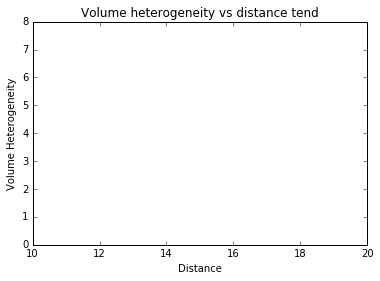

In [188]:
import numpy as np
varvolume = []
maxdist = 0
varvolumereal1 = []
for i in datatend:
    if i[1]>maxdist:
        maxdist = i[1]
for i in range(int(maxdist/5)+1):
    varvolume.append([])
for i in datatend:
        varvolume[int(i[1]/5)].append(i[0])
for i in varvolume:
    varvolumereal1.append(np.array(i).std())
x = range(0,int(maxdist), 5)
plt.plot(x,varvolumereal1)
plt.title('Volume heterogeneity vs distance tend')
plt.xlabel('Distance')
plt.ylabel('Volume Heterogeneity')

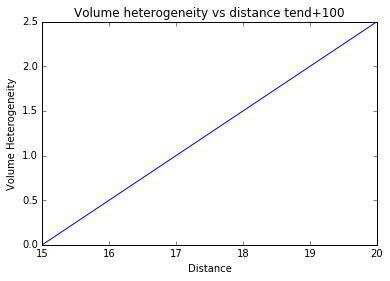

In [190]:
varvolume = []
maxdist = 0
varvolumereal2 = []
for i in datatend100:
    if i[1]>maxdist:
        maxdist = i[1]
for i in range(int(maxdist/5)+1):
    varvolume.append([])
for i in datatend100:
        varvolume[int(i[1]/5)].append(i[0])
for i in varvolume:
    varvolumereal2.append(np.array(i).std())
x = range(0,int(maxdist), 5)
plt.plot(x,varvolumereal2)
plt.title('Volume heterogeneity vs distance tend+100')
plt.xlabel('Distance')
plt.ylabel('Volume Heterogeneity')

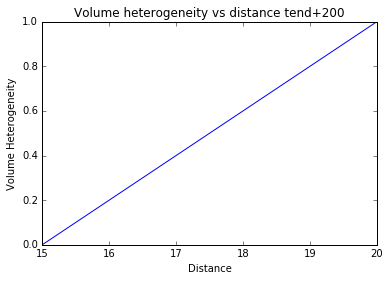

In [192]:
varvolume = []
maxdist = 0
varvolumereal3 = []
for i in datatend200:
    if i[1]>maxdist:
        maxdist = i[1]
for i in range(int(maxdist/5)+1):
    varvolume.append([])
for i in datatend200:
        varvolume[int(i[1]/5)].append(i[0])
for i in varvolume:
    varvolumereal3.append(np.array(i).std())
x = range(0,int(maxdist), 5)
plt.plot(x,varvolumereal3)
plt.title('Volume heterogeneity vs distance tend+200')
plt.xlabel('Distance')
plt.ylabel('Volume Heterogeneity')

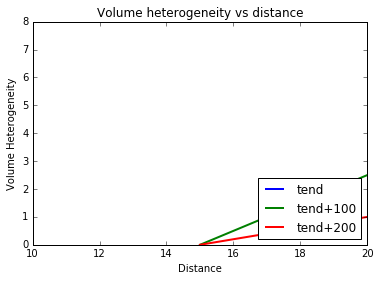

In [193]:
plt.plot(x,varvolumereal1 , label = "tend", linewidth = 2)

plt.plot(x,varvolumereal2, label = "tend+100", linewidth = 2)

plt.plot(x,varvolumereal3, label = "tend+200", linewidth = 2)
plt.title('Volume heterogeneity vs distance')
plt.xlabel('Distance')
plt.ylabel('Volume Heterogeneity')
plt.legend(loc =4)
plt.savefig("Circular Volume heterogeneity Circle R2")

In [194]:
vol=[]
for i in datatend:
    vol.append(i[0])
x = np.array(vol)
unique, counts = np.unique(x, return_counts=True)
print unique

[1599 1614 1616]


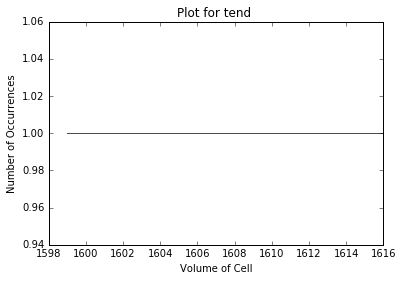

In [195]:
plt.plot(unique, counts , 'r-')
plt.title('Plot for tend ')
plt.xlabel('Volume of Cell')
plt.ylabel('Number of Occurrences')

In [196]:
vol=[]
for i in datatend100:
    vol.append(i[0])
x = np.array(vol)
unique100, counts100 = np.unique(x, return_counts=True)
print unique100

[1712 1717 1719]


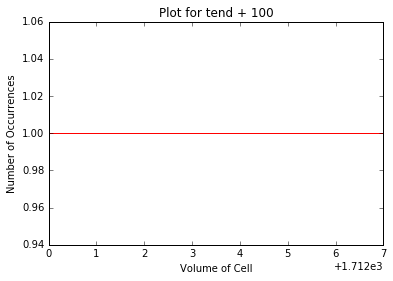

In [197]:
plt.plot(unique100, counts100 , 'r-')
plt.title('Plot for tend + 100')
plt.xlabel('Volume of Cell')
plt.ylabel('Number of Occurrences')

In [198]:
vol=[]
for i in datatend200:
    vol.append(i[0])
x = np.array(vol)
unique200, counts200 = np.unique(x, return_counts=True)
print unique200

[1714 1716 1718]


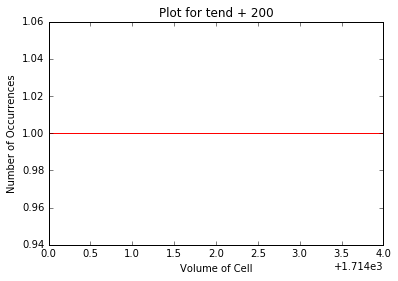

In [199]:
plt.plot(unique200, counts200 , 'r-')
plt.title('Plot for tend + 200')
plt.xlabel('Volume of Cell')
plt.ylabel('Number of Occurrences')

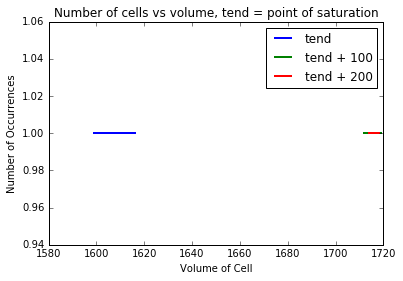

In [200]:
plt.plot(unique, counts , label = 'tend' , linewidth = 2)
plt.plot(unique100, counts100 , label = 'tend + 100' , linewidth = 2)
plt.plot(unique200, counts200 , label = 'tend + 200' , linewidth = 2)
plt.title('Number of cells vs volume, tend = point of saturation')
plt.xlabel('Volume of Cell')
plt.ylabel('Number of Occurrences')
plt.legend()
plt.savefig("Volume distribution Circle R2.png")

In [201]:
datatend = []
datatend100 = []
datatend200 = []
for i in newdata:
    if int(i[0])==tend:
        datatend.append(int(float(i[4])))
    if int(i[0])==tend+100:
        datatend100.append(int(float(i[4])))
    if int(i[0])==tend+200:
        datatend200.append(int(float(i[4])))
    if int(i[0])> tend + 200:
        break

In [202]:
import numpy as np
x = np.array(datatend)
unique, counts = np.unique(x, return_counts=True)
print unique

[222 230 246]


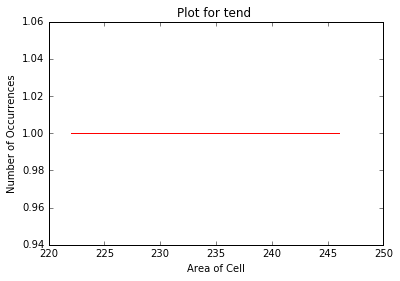

In [203]:
plt.plot(unique, counts , 'r-')
plt.title('Plot for tend ')
plt.xlabel('Area of Cell')
plt.ylabel('Number of Occurrences')

In [204]:
x = np.array(datatend100)
unique100, counts100 = np.unique(x, return_counts=True)
print unique100

[218 224 244]


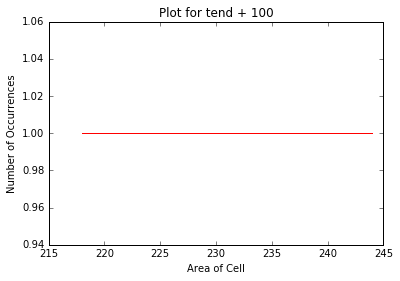

In [205]:
plt.plot(unique100, counts100 , 'r-')
plt.title('Plot for tend + 100')
plt.xlabel('Area of Cell')
plt.ylabel('Number of Occurrences')

In [206]:
x = np.array(datatend200)
unique200, counts200 = np.unique(x, return_counts=True)
print unique200

[218 234]


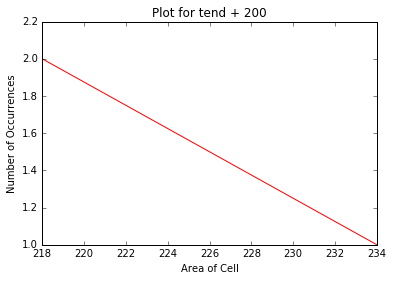

In [207]:
plt.plot(unique200, counts200 , 'r-')
plt.title('Plot for tend + 200')
plt.xlabel('Area of Cell')
plt.ylabel('Number of Occurrences')

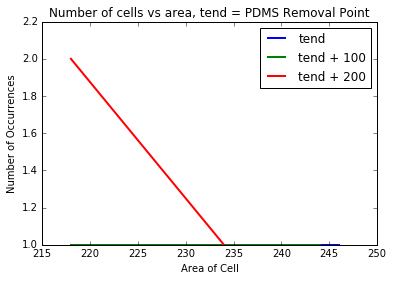

In [208]:
plt.plot(unique, counts , label = 'tend' , linewidth = 2)
plt.plot(unique100, counts100 , label = 'tend + 100' , linewidth = 2)
plt.plot(unique200, counts200 , label = 'tend + 200' , linewidth = 2)
plt.title('Number of cells vs area, tend = PDMS Removal Point')
plt.xlabel('Area of Cell')
plt.ylabel('Number of Occurrences')
plt.legend()
plt.savefig("Area plotall Circle R2.png")